# Integrals

We are going to cover how to do integration in Python. We will visit:

- Analytical/Symbolic integration: compute the exact solution using mathematical integration rules

- Numerical integration. This is going to be an approximate solution using the trapezoidal rule to approximate the area under the curve

This is the function we want to integrate $f(x)=3x^2+1$. 

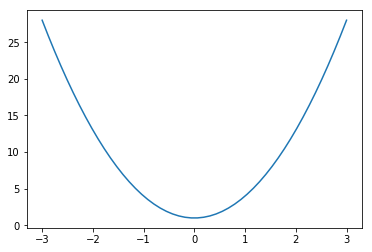

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 3*x**2+1


x=np.linspace(-3, 3)
plt.plot(x,f(x)) #Plot f(x)

Let's say we want to integrate $f(x)$. We can calculate the solution by hand:

$\int_{0}^{2} (3x^2+1) dx=x^3+x+C$

If we just want to calculate the area of the function from 0 to 2.

$\int_{0}^{2} (3x^2+1) dx=x^3+x+C \mid_{0}^{2}=(2^3+2+C)-(0^3+0+C)=10$

## Analytical/symbolic integration

Let's now use the computer to find the indefinite integral analytically:

In [1]:
import sympy as sp
x=sp.Symbol('x')
f=3*x**2+1
sp.integrate(f,x) 

x**3 + x

Let's now use the computer to find the definite integral analytically (the area below the function from $x=0$ to $x=2$:

In [2]:
sp.integrate(f,x).evalf(subs={x:2})-sp.integrate(f,x).evalf(subs={x:0})

10.0000000000000

## Numerical integration

Numerical integration is not necessarily perfectly accurate because although it is a more sophisticated version of the rectangle method using midpoints, there is error associated with it which is reflected in the accurary measure. The exact approach to calculating the area under a function or set of functions is to determine the antiderivative of the function  and then substitute values for the endpoints of the integral using the Evaluation Theorem. 

Let's now calculate the integral of $f(x)$ from 0 to 2 numerically (i.e. $\int_0^2 3x^2 +1 dx $)

In [3]:
from scipy.integrate import quad

def f(x):
    return 3*x**2+1

i=quad(f,0,2)
print(i)

(10.000000000000002, 1.1102230246251568e-13)


The first value returned is the actual estimated numerical integral. The second value is the estimate of the error. Remember that this is a numerical method which only offers an approximation to the analytical solution.

Why would we evaluate an integral numerically, as opposed to symbolically given that numerical integration is not perfectly accurate? The answer is that many functions do not have an integral that evaluates symbolically, so numerical methods are required to approximate the integral.

## Finding Integrals using the online tool WolframAlpha

Check out this online computational engine to Integrate a function and many other mathematical tools:

What is the result of $\int_{0}^{2} x^2 + 1 dx$? [Click here to find out](https://www.wolframalpha.com/input/?i=integrate+(3x%5E2+%2B1)+0+to+2)

## Dialysis treatment application

Dialysis treatment consist of removing urea and other waste products from a patient’s blood by diverting some of the blood flow externally through a machine called a dialyzer. The rate at which urea is removed from the blood (in mg/min) is often
well described by the equation 

$
\Large
c(t)=\frac{K}{V}c_0e^{-K\frac{t}{V}}$


where $K$ is the rate of flow of blood through the dialyzer (in mL/min), $V$ is the volume of the patient’s blood (in mL),
and $c_0$ is the amount of urea in the blood (in mg) at time $t = 0$. Let's evaluate the integral $\int_{0}^{30}c(t) dt$ and interpret it.

We begin by defining the function:

In [4]:
sp.Function('c')
t,K,V,c_0=sp.symbols('t,K,V,c_0') 

def c(t):
    return K/V*c_0*sp.exp(-K*t/V) 

Integrate the function symbolically, i.e. find the antiderivative of the function

In [5]:
C_t=sp.integrate(c(t),t)
C_t

-c_0*exp(-K*t/V)

Use the Evaluation Theorem to evaluate the integral across an interval 

In [6]:
C_t.subs(t,30)-C_t.subs(t,0) 

c_0 - c_0*exp(-30*K/V)

So $\int_{0}^{30}\frac{K}{V}c_0e^{-K\frac{t}{V}}dt = \int_{0}^{30}c(t)dt=c_0-c_0e^{(-30\frac{K}{V})}$


$c(t)$ is the rate urea is removed from by dialysis at time $t$, so $\lim_{\Delta t\to 0} c(t)\Delta t$ is the amount of
urea that is removed over a very small time interval.

An integral sums these very small amounts across the interval from a to b, which corresponds to the total amount of urea that is removed from time points a to b, where in our case a = 0 and b = 30. 

By substituting the constants $c_0$, $K$ and $V$ in $c_0-c_0e^{(-30\frac{K}{V})}$ we would find out the total amount of urea removed by the machine in 30 minutes.

In [7]:
C_t.evalf(subs={t:30,K:0.2,V:6,c_0:0.1})-C_t.evalf(subs={t:0,K:0.2,V:6,c_0:0.1})

0.0632120558828558